## Ukesoppgaver IN2070: Kompresjon og Koding I

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import heapq

from PIL import Image
from urllib.request import urlretrieve

# Setter opp noen bedre standardargumenter for plotting med bilder
plt.rcParams['figure.figsize'] = [10.24, 7.68]
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Last ned testbilde vi skal bruke
url = '/studier/emner/matnat/ifi/IN2070/h23/undervisningsmateriale/bilder/lena.png'
if not os.path.isfile('lena.png'):
    urllib.request.urlretrieve(url, 'lena.png')

In [3]:
# Laster inn bilde som array med PIL og normaliserer til flyttall
image = np.array(Image.open('lena.png')) / 255

# Eksempel på en funksjon som henter ut leksikografisk skannerekkefølge
def raster_scan(height, width):
    idx = np.arange(height*width)
    xidx = idx % width
    yidx = idx // width
    return yidx, xidx

### Oppgave 1:

La $f$ være et gråtonebilde med høyde $H$ og bredde $W$. 

#### Oppgave 1a:
Skriv en funksjon som returnerer to sekvenser med indekser $(y_i)_{i=1}^{HW}, (x_i)_{i=1}^{HW}$ slik at $\big(f(x_i,y_i)\big)_{i=1}^{HW}$ returnerer gråtoneverdiene i kontinuerlig diagonal skannerekkefølge. 

Eksempelvis, for et $3 \times 3$ bilde ønsker vi en rekkefølge gitt av
$$
\begin{bmatrix}
1& 3& 4 \\ 
2& 5& 8 \\
6& 7& 9 \\
\end{bmatrix}
$$

som gir indeksene (med start i én) $x = (1,1,2,3,2,1,2,3,3)$ og $y = (1,2,1,1,2,3,3,2,3)$.

#### Oppgave 1b:
Skriv en funksjon som returnerer indekser for en kontinuerlig spiralrekkefølge. 

Eksempelvis, for et $3 \times 3$ bilde ønsker vi denne gangen en rekkefølge gitt av
$$
\begin{bmatrix}
1& 2& 3 \\ 
8& 9& 4 \\
7& 6& 5 \\
\end{bmatrix}
$$

### Tips:

- Det er lett å hente ut den $n$te positive diagonalen fra en matrise `A` med bruk av `A.diagonal(n)`. 
- Dersom man ønsker en negativ diagonal kan man flippe matrisen med bruk av `np.fliplr` eller `np.flipud`.
- For en kontinuerlig skannerekkefølge, kan det også være nyttig å huske at vi kan invertere rekkefølgen på et array ved hjelp av `arr[::-1]`.
- For å slå sammen to eller flere arrays langs siste dimensjon kan man bruke `np.concatenate([arr1, arr2,...], axis=-1)`.
- Det kan også være nyttig å se på eksempelfunksjonen `raster_scan` som implementerer den standardiserte skannerekkefølgen.

In [4]:
# Fasit
def continuous_diagonal_scan(height, width):
    grid = np.arange(height*width).reshape(height, width)
    diagonals = np.arange(width-1, -height, -1)
    idx = np.concatenate([
        np.fliplr(grid).diagonal(d)[::2*(1-i%2)-1] 
        for i, d in enumerate(diagonals)
    ], 0)
    xidx = idx % width
    yidx = idx // width
    return yidx, xidx


def continuous_spiral_scan(height, width):
    # Treg, kan sikkert forbedres med litt triksing...
    grid = np.arange(height * width).reshape(height, width)
    indices = np.zeros((2, height * width), dtype=int)
    top, bottom, left, right = 0, height-1, 0, width-1
    idx = 0
    
    while top <= bottom and left <= right:
        indices[:, idx:idx+right-left+1] = np.array([np.full(right-left+1, top), np.arange(left, right+1)])
        idx += right-left+1
        top += 1
        
        if top <= bottom:
            indices[:, idx:idx+bottom-top+1] = np.array([np.arange(top, bottom+1), np.full(bottom-top+1, right)])
            idx += bottom-top+1
            right -= 1
        
        if left <= right:
            indices[:, idx:idx+right-left+1] = np.array([np.full(right-left+1, bottom), np.arange(right, left-1, -1)])
            idx += right-left+1
            bottom -= 1
        
        if top <= bottom:
            indices[:, idx:idx+bottom-top+1] = np.array([np.arange(bottom, top-1, -1), np.full(bottom-top+1, left)])
            idx += bottom-top+1
            left += 1
    
    return indices


### Oppgave 2:

I cellen under har vi en funksjon `scan_2d_to_1d` som tar ett bilde og en skannerekkefølgefunksjon som parametre, og returnerer bildet som en sekvens mhp. skannerekkefølgen. Skriv en funksjon `scan_1d_to_2d` som rekonstruerer originalbildet gitt de éndimensjonale sekvensen, bildedimensjonene, og skannerekkefølgefunksjonen.

In [5]:
def scan_2d_to_1d(image, scanfn):
    height, width = image.shape
    return image[scanfn(height, width)]

def scan_1d_to_2d(seq, height, width, scanfn):
    # Skriv resten av funksjonen
    return ...

In [6]:
# Fasit
def scan_2d_to_1d(image, scanfn):
    height, width = image.shape
    return image[scanfn(height, width)]

def scan_1d_to_2d(seq, height, width, scanfn):
    img = np.zeros_like(seq).reshape(height, width)
    img[scanfn(height, width)] = seq
    return img

### Oppgave 3:

#### Oppgave 3a:
Skriv en funksjon som regner differansetransformen over den siste dimensjonen til en sekvens eller bilde.

#### Oppgave 3b:
Skriv en funksjon som regner invers differansetransformen over den siste dimensjonen til et signal eller bilde.

#### Tips:
- Husk at indeksering i Python aksepterer det som kalles `Ellipsis` objektet `...`. Dette gjør at vi kan "hoppe over" indekser vi ikke ønsker å endre.
- Det kan være nyttig å benytte indekseringstriks som `arr[...,a:b:s]` der `a` er en startindeks, `b` er stoppindeks, og `s` er steglengde.
- Ett annet tips som kanskje er nyttig er at å bruke indeksering `arr[...,None]` utvider dimensjonen med én i siste dimensjon.
- For a gjøre kumulativ summering for inverstransformen kan man med hell benytte `np.cumsum`.
- Vi har også funksjonen `np.diff` i numpy som kan gjøre differansen for oss. Les litt i [dokumentasjonen](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) hvis du vil vite mer.
- For å sikre at du har gjort det riktig, kall gjerne `plt.matshow` for å se at differanse og inverstransform er implementert korrekt.

In [7]:
# Fasit
def deltatransform(arr):
    return np.diff(arr, axis=-1, prepend=np.zeros_like(arr[..., :1]))

def inverse_deltatransform(arr):
    return np.cumsum(arr, axis=-1)

### Oppgave 4:

#### Oppgave 4a:
Skriv en funksjon som kvantiserer et bilde eller sekvens fra flyttallsrepresentasjon i $[0,1]$ til heltall med bitlengde $b$. 
- Du trenger ikke representere tallet med korrekt antall biter i datatypen, siden ikke alle bitlengder har en egen datatype. 
- I stedet bruker vi metoden `seq.astype(np.int64)` som midlertidig representerer tallet med 64 biters presisjon.

#### Oppgave 4b:
Skriv en funksjon som kvantiserer samt regner ut entropien til et array (en sekvens eller bilde).

#### Oppgave 4c:
Regn ut entropien av `image` kvantisert til 4, 6, og 8 bit dybde (også kalt bitlengde), og sammenlikn dette med entropien til bilder med differansetransformen (kvantisert til  samme bitdybde).

In [8]:
# Fasit

def quantize(seq, b):
    q = 2**b-1
    return (seq * q).astype(np.int64)

def entropy(seq, b=None):
    if b is not None:
        seq = quantize(seq, b)
    m = seq.size
    symbols, freq = np.unique(seq, return_counts=True)
    n = symbols.size
    p = freq/m
    return (-p * np.log2(p)).sum()

im8 = quantize(image, 8)
im6 = quantize(image, 6)
im4 = quantize(image, 4)

dt8 = deltatransform(im8)
dt6 = deltatransform(im6)
dt4 = deltatransform(im4)

print(f'''
H8: {entropy(im8):7.5f} \t Hd8: {entropy(dt8):7.5f}
H6: {entropy(im6):7.5f} \t Hd6: {entropy(dt6):7.5f}
H4: {entropy(im4):7.5f} \t Hd4: {entropy(dt4):7.5f}
''')


H8: 7.44776 	 Hd8: 5.07434
H6: 5.43760 	 Hd6: 3.11490
H4: 3.41475 	 Hd4: 1.46953



### Oppgave 5:

Regn ut entropien til differansetransformen av bildet med skannerekkefølgene fra oppgave 1 og sammenlign resultatene for bitdybder 4, 6, 8. Hva observerer du, og hvilken metode vil du foretrekke?

In [9]:
# Fasit
result_string = ''
for b in [8, 6, 4]:
    cd = entropy(deltatransform(scan_2d_to_1d(image, continuous_diagonal_scan)), b)
    sd = entropy(deltatransform(scan_2d_to_1d(image, continuous_spiral_scan)), b)
    result_string += f'Hc{b}: {cd:7.5f} \t Hs{b}: {sd:7.5f}\n'
print(result_string)

Hc8: 4.86099 	 Hs8: 4.84055
Hc6: 2.44710 	 Hs6: 2.42517
Hc4: 0.60941 	 Hs4: 0.61556



### Oppgave 6:

#### Oppgave 6a:
Skriv en funksjon som dekomponerer et kvantisert bilde i bitplan, og plott planene for bitdybde 8.

#### Oppgave 6b:
Skriv en funksjon som konverterer til gråkode. Bruk dekomponeringsfunksjonen til å visualisere bitplanene til gråkoden og sammenlikn med resultatet i oppgave 6a.


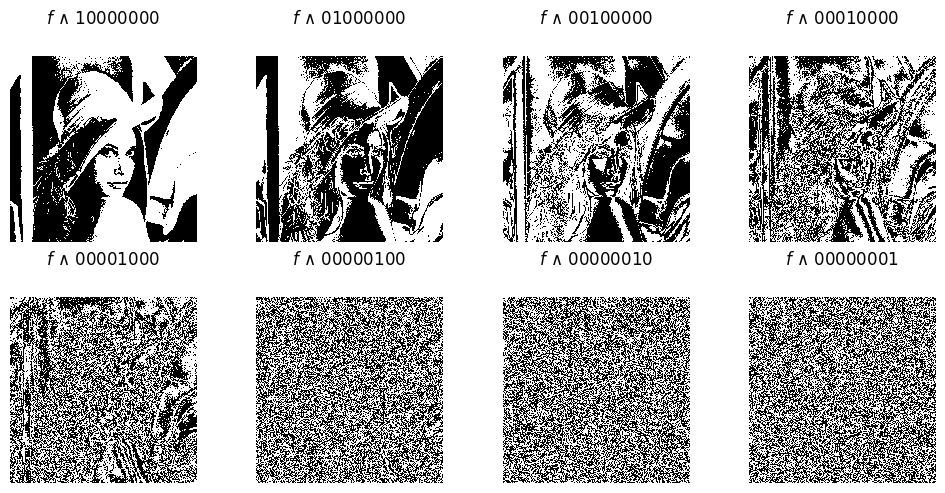

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for i, a in enumerate(ax.flatten()):
    a.matshow((quantize(image,8) >> 7-i) & 1)
    a.set_title(f'$f$ ∧ {int(bin(1 << 7 - i)[2:]):08d}')
    a.axis('off')
    
plt.tight_layout()

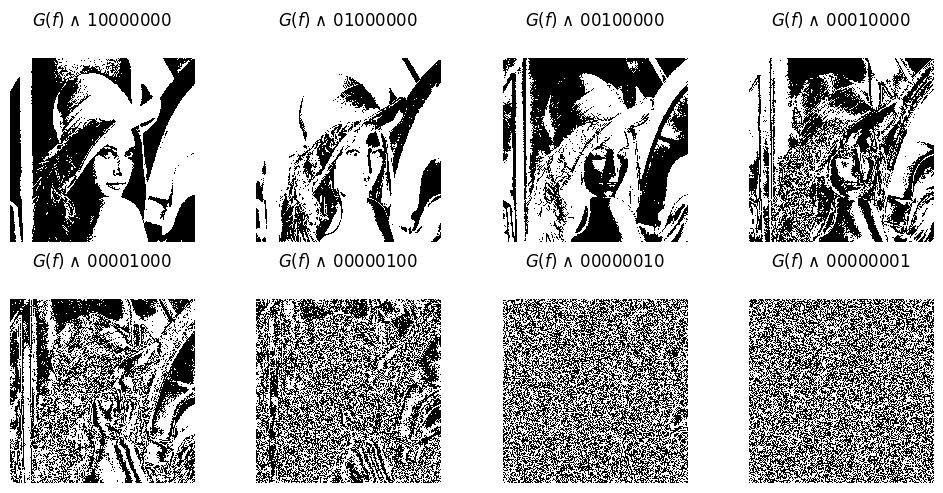

In [11]:
def to_gray_code(image):
    shifted_image = image >> 1
    gray_image = image ^ shifted_image    
    return gray_image

fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for i, a in enumerate(ax.flatten()):
    a.matshow((to_gray_code(quantize(image,8)) >> 7-i) & 1)
    a.set_title(f'$G(f)$ ∧ {int(bin(1 << 7 - i)[2:]):08d}')
    a.axis('off')
    
plt.tight_layout()

### Oppgave 7:

Til slutt skal vi implementere Huffman koding. Fra forelesningen husker vi algoritmen:
1. Konstruer enkeltnode Huffman-trær med hvert av de $n$ symbolene $s_i$ med tilhørende vekt $f(s_i)$.
2. Repeter følgende til vi ender opp med ett enkelt tre:
    - Velg to trær $T_0$ og $T_1$ med minimal vekt. 
    - Erstatt $T_0$ og $T_1$ med et nytt tre som har $T_0$ som venstre subtre og $T_1$ som høyre subtre.
    
Resultatet skal være en Python dictionary.

#### Tips:
- Bruk av `np.unique(arr, return_counts=True)` er veldig lurt å bruke for å hente symboler og frekvenser.
- `heapq` modulen i Python kan med hell benyttes. Se [dokumentasjonen](https://docs.python.org/3/library/heapq.html) for mer info.

In [12]:
def get_huffman_dict(arr):
    huffman_tree = [
        [weight, [symbol, ""]] for symbol, weight in np.stack(np.unique(arr, return_counts=True),-1)
    ]
    heapq.heapify(huffman_tree)

    while len(huffman_tree) > 1:
        lo = heapq.heappop(huffman_tree)
        hi = heapq.heappop(huffman_tree)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(huffman_tree, [lo[0] + hi[0]] + lo[1:] + hi[1:])

    # Remove the frequency count to get the true Huffman tree
    huffman_tree = sorted(heapq.heappop(huffman_tree)[1:], key=lambda p: (len(p[-1]), p))

    # Generate and return Huffman dictionary
    return {symbol: code for symbol, code in huffman_tree}